Coding Challenge #5
It´s time to practice:



1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('seaborn-v0_8')

In [4]:
ba = pd.read_csv('boeing.csv', parse_dates=['Date'], index_col='Date')

In [5]:
ba

,Price
Date,
2010-01-04,43.7776
2010-01-05,45.2114
2010-01-06,46.5828
2010-01-07,48.4686
2010-01-08,48.0010
...,...
2020-12-23,219.6900
2020-12-24,217.1500
2020-12-28,216.0900


In [8]:
ba['log_return'] = np.log(ba / ba.shift(1))
ba

,Price,log_return
Date,,
2010-01-04,43.7776,NaN
2010-01-05,45.2114,0.0322
2010-01-06,46.5828,0.0299
2010-01-07,48.4686,0.0397
2010-01-08,48.0010,-0.0097
...,...,...
2020-12-23,219.6900,0.0042
2020-12-24,217.1500,-0.0116
2020-12-28,216.0900,-0.0049


In [9]:
ann_mean = ba['log_return'].mean() * 252
ann_std = ba['log_return'].std() * np.sqrt(252)
print(f'Annualized Mean: {ann_mean:.4f}, Annualized Std: {ann_std:.4f}')

Annualized Mean: 0.1456, Annualized Std: 0.3553


In [10]:
# Resample to monthly prices (using last price of each month)
ba_monthly = ba['Price'].resample('ME').last()

# Calculate monthly log returns
ba_monthly_log_return = np.log(ba_monthly / ba_monthly.shift(1))

# Annualized std from monthly log returns (multiply by sqrt(12))
ann_std_monthly = ba_monthly_log_return.std() * np.sqrt(12)

print(f'Annualized Std (Daily): {ann_std:.4f}')
print(f'Annualized Std (Monthly): {ann_std_monthly:.4f}')

Annualized Std (Daily): 0.3553
Annualized Std (Monthly): 0.3360


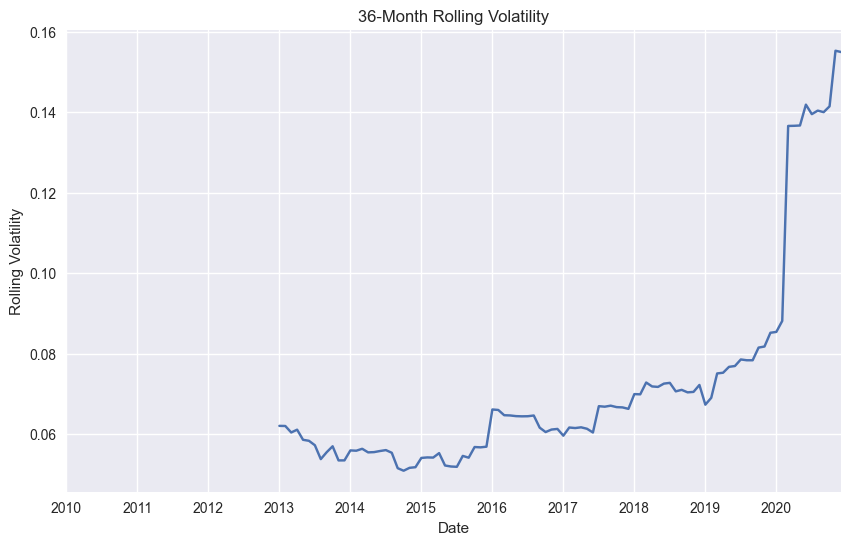

In [11]:
window = 36
ba_monthly_log_return.rolling(window=window).std().plot(title=f'{window}-Month Rolling Volatility', figsize=(10, 6))
plt.ylabel('Rolling Volatility')
plt.show()
#!/usr/bin/env python3